In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import missingno as mn
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
import pylab as py
import import_ipynb

In [2]:
import Template as t

importing Jupyter notebook from Template.ipynb


In [3]:
df=t.load_data('csv')

Enter path of filedata.csv


In [4]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
t.overview(df,'head',7)

The shape is : (6819, 96)
The column data types are: 

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             f

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [7]:
t.change_descr(df,' ROA(C) before interest and depreciation before interest',value=None,new_value=None)

Remove white space? Y or NN
change column name? Y or NY
Remove with space? Y or NY


In [8]:
t.overview(df,'head',7)

The shape is : (6819, 96)
The column data types are: 

Bankrupt?                                              int64
ROA(C)beforeinterestanddepreciationbeforeinterest    float64
ROA(A)beforeinterestand%aftertax                     float64
ROA(B)beforeinterestanddepreciationaftertax          float64
OperatingGrossMargin                                 float64
RealizedSalesGrossMargin                             float64
OperatingProfitRate                                  float64
Pre-taxnetInterestRate                               float64
After-taxnetInterestRate                             float64
Non-industryincomeandexpenditure/revenue             float64
Continuousinterestrate(aftertax)                     float64
OperatingExpenseRate                                 float64
Researchanddevelopmentexpenserate                    float64
Cashflowrate                                         float64
Interest-bearingdebtinterestrate                     float64
Taxrate(A)                    

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,Continuousinterestrate(aftertax),OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interest-bearingdebtinterestrate,Taxrate(A),NetValuePerShare(B),NetValuePerShare(A),NetValuePerShare(C),PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShare(Yuan¥),OperatingProfitPerShare(Yuan¥),PerShareNetprofitbeforetax(Yuan¥),RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,After-taxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment%,CurrentRatio,QuickRatio,InterestExpenseRatio,Totaldebt/Totalnetworth,Debtratio%,Networth/Assets,Long-termfundsuitabilityratio(A),Borrowingdependency,Contingentliabilities/Networth,Operatingprofit/Paid-incapital,Netprofitbeforetax/Paid-incapital,Inventoryandaccountsreceivable/Netvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRate(times),FixedAssetsTurnoverFrequency,NetWorthTurnoverRate(times),Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssets/TotalAssets,CurrentAssets/TotalAssets,Cash/TotalAssets,QuickAssets/CurrentLiability,Cash/CurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,Inventory/WorkingCapital,Inventory/CurrentLiability,CurrentLiabilities/Liability,WorkingCapital/Equity,CurrentLiabilities/Equity,Long-termLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,Totalincome/Totalexpense,Totalexpense/Assets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLong-termLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0

0    6599
1     220
Name: Bankrupt?, dtype: int64


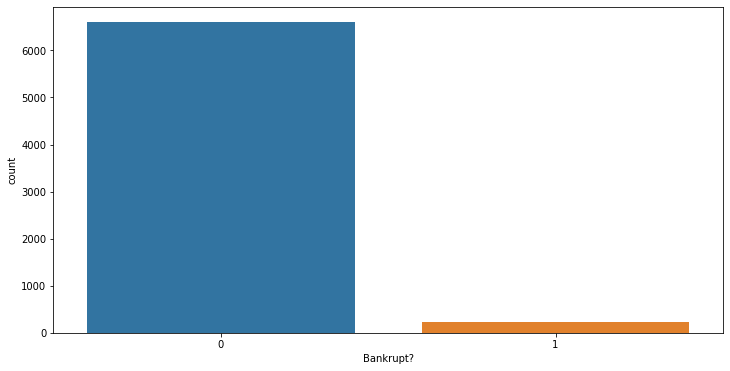

In [9]:
t.categorical_analysis(df,'Bankrupt?')

1    6819
Name: NetIncomeFlag, dtype: int64


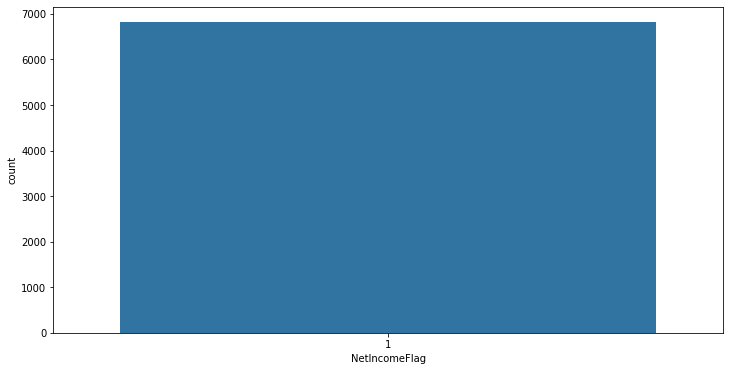

In [10]:
t.categorical_analysis(df,'NetIncomeFlag')

In [11]:
t.remove_cols(df,'NetIncomeFlag')

In [12]:
df.columns

Index(['Bankrupt?', 'ROA(C)beforeinterestanddepreciationbeforeinterest',
       'ROA(A)beforeinterestand%aftertax',
       'ROA(B)beforeinterestanddepreciationaftertax', 'OperatingGrossMargin',
       'RealizedSalesGrossMargin', 'OperatingProfitRate',
       'Pre-taxnetInterestRate', 'After-taxnetInterestRate',
       'Non-industryincomeandexpenditure/revenue',
       'Continuousinterestrate(aftertax)', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interest-bearingdebtinterestrate', 'Taxrate(A)', 'NetValuePerShare(B)',
       'NetValuePerShare(A)', 'NetValuePerShare(C)',
       'PersistentEPSintheLastFourSeasons', 'CashFlowPerShare',
       'RevenuePerShare(Yuan¥)', 'OperatingProfitPerShare(Yuan¥)',
       'PerShareNetprofitbeforetax(Yuan¥)',
       'RealizedSalesGrossProfitGrowthRate', 'OperatingProfitGrowthRate',
       'After-taxNetProfitGrowthRate', 'RegularNetProfitGrowthRate',
       'ContinuousNetProfitGrowthRate', 'TotalAssetGrowthR

#### Removing correlated features

In [28]:
df2=t.deep_copy(df)

In [29]:
corr_matrix=df2.corr().abs()

In [32]:
len(corr_matrix)

95

In [33]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,Continuousinterestrate(aftertax),OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interest-bearingdebtinterestrate,Taxrate(A),NetValuePerShare(B),NetValuePerShare(A),NetValuePerShare(C),PersistentEPSintheLastFourSeasons,CashFlowPerShare,RevenuePerShare(Yuan¥),OperatingProfitPerShare(Yuan¥),PerShareNetprofitbeforetax(Yuan¥),RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,After-taxNetProfitGrowthRate,RegularNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment%,CurrentRatio,QuickRatio,InterestExpenseRatio,Totaldebt/Totalnetworth,Debtratio%,Networth/Assets,Long-termfundsuitabilityratio(A),Borrowingdependency,Contingentliabilities/Networth,Operatingprofit/Paid-incapital,Netprofitbeforetax/Paid-incapital,Inventoryandaccountsreceivable/Netvalue,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRate(times),FixedAssetsTurnoverFrequency,NetWorthTurnoverRate(times),Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssets/TotalAssets,CurrentAssets/TotalAssets,Cash/TotalAssets,QuickAssets/CurrentLiability,Cash/CurrentLiability,CurrentLiabilitytoAssets,OperatingFundstoLiability,Inventory/WorkingCapital,Inventory/CurrentLiability,CurrentLiabilities/Liability,WorkingCapital/Equity,CurrentLiabilities/Equity,Long-termLiabilitytoCurrentAssets,RetainedEarningstoTotalAssets,Totalincome/Totalexpense,Totalexpense/Assets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,WorkingcapitcalTurnoverRate,CashTurnoverRate,CashFlowtoSales,FixedAssetstoAssets,CurrentLiabilitytoLiability,CurrentLiabilitytoEquity,EquitytoLong-termLiability,CashFlowtoTotalAssets,CashFlowtoLiability,CFOtoAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),EquitytoLiability
Bankrupt?,NaN,0.260807,0.282941,0.273051,0.100043,0.099445,0.000230,0.008517,0.008857,0.016593,0.008395,0.006083,0.024232,0.072356,0.023063,0.109706,0.165399,0.165465,0.164784,0.219560,0.077516,0.004692,0.142051,0.201395,0.000458,0.015168,0.037783,0.036820,0.009401,0.044431,0.065329,0.016858,0.051345,0.002211,0.025058,0.002681,0.012314,0.250161,0.250161,0.016920,0.176543,0.070455,0.141111,0.207857,0.075278,0.067915,0.004754,0.006556,0.001376,0.072818,0.021089,0.039718,0.092842,0.002829,0.193083,0.086382,0.044823,0.100130,0.003823,0.077921,0.194494,0.077082,0.001906,0.000822,0.020809,0.147221,0.153828,0.000778,0.217779,0.007137,0.139049,0.011929,0.025814,0.002894,0.018035,0.000479,0.066328,0.020809,0.153828,0.139014,0.070456,0.043125,0.115383,0.058563,0.171306,0.139212,0.315457,0.035104,0.005547,0.100044,0.180987,0.166812,0.010508,0.005509,0.083048
ROA(C)beforeinterestanddepreciationbeforeinterest,NaN,NaN,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,0.021930,0.079906,0.296158,0.013196,0.026336,0.003988,0.022208,0.261427,0.261427,0.002967,0.161671,0.035729,0.685028,0.753339,0.109888,0.210622,0.033947,0.007019,0.062660,0.065919,0.022896,0.014834,0.301996,0.012543,0.259680,0.181993,0.098820,0.235314,0.010530,0.046009,0.210256,0.388151,0.004447,0.013330,0.052783,0.103819,0.142734,0.021508,0.650217,0.023450,0.296019,0.005716,0.027280,0.001824,0.029477,0.011759,0.009192,0.052783,0.142734,0.086535,0.262454

In [34]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [35]:
to_drop

['ROA(A)beforeinterestand%aftertax',
 'ROA(B)beforeinterestanddepreciationaftertax',
 'RealizedSalesGrossMargin',
 'Pre-taxnetInterestRate',
 'After-taxnetInterestRate',
 'Continuousinterestrate(aftertax)',
 'NetValuePerShare(A)',
 'NetValuePerShare(C)',
 'PersistentEPSintheLastFourSeasons',
 'OperatingProfitPerShare(Yuan¥)',
 'PerShareNetprofitbeforetax(Yuan¥)',
 'RegularNetProfitGrowthRate',
 'Networth/Assets',
 'Operatingprofit/Paid-incapital',
 'Netprofitbeforetax/Paid-incapital',
 'Inventoryandaccountsreceivable/Netvalue',
 'NetWorthTurnoverRate(times)',
 'CurrentAssets/TotalAssets',
 'CurrentLiabilitytoAssets',
 'OperatingFundstoLiability',
 'WorkingCapital/Equity',
 'CurrentLiabilities/Equity',
 'RetainedEarningstoTotalAssets',
 'WorkingcapitcalTurnoverRate',
 'CashFlowtoSales',
 'CurrentLiabilitytoLiability',
 'CurrentLiabilitytoEquity',
 'EquitytoLong-termLiability',
 'CashFlowtoLiability',
 'CFOtoAssets',
 'NetIncometoTotalAssets',
 'GrossProfittoSales',
 "NetIncometoStockhol

In [39]:
t.missing_details(df2)

,"Missing value, %",Missing value count,N unique value
Bankrupt?,0.0,0,2
ROA(C)beforeinterestanddepreciationbeforeinterest,0.0,0,3333
OperatingGrossMargin,0.0,0,3781
OperatingProfitRate,0.0,0,3376
Non-industryincomeandexpenditure/revenue,0.0,0,2551
OperatingExpenseRate,0.0,0,2966
Researchanddevelopmentexpenserate,0.0,0,1536
Cashflowrate,0.0,0,5557
Interest-bearingdebtinterestrate,0.0,0,1080
Taxrate(A),0.0,0,2488


In [37]:
df2.drop(df2[to_drop],axis=1,inplace=True)

In [44]:
corr=df2.corr().abs()
corr

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,OperatingGrossMargin,OperatingProfitRate,Non-industryincomeandexpenditure/revenue,OperatingExpenseRate,Researchanddevelopmentexpenserate,Cashflowrate,Interest-bearingdebtinterestrate,Taxrate(A),NetValuePerShare(B),CashFlowPerShare,RevenuePerShare(Yuan¥),RealizedSalesGrossProfitGrowthRate,OperatingProfitGrowthRate,After-taxNetProfitGrowthRate,ContinuousNetProfitGrowthRate,TotalAssetGrowthRate,NetValueGrowthRate,TotalAssetReturnGrowthRateRatio,CashReinvestment%,CurrentRatio,QuickRatio,InterestExpenseRatio,Totaldebt/Totalnetworth,Debtratio%,Long-termfundsuitabilityratio(A),Borrowingdependency,Contingentliabilities/Networth,TotalAssetTurnover,AccountsReceivableTurnover,AverageCollectionDays,InventoryTurnoverRate(times),FixedAssetsTurnoverFrequency,Revenueperperson,Operatingprofitperperson,Allocationrateperperson,WorkingCapitaltoTotalAssets,QuickAssets/TotalAssets,Cash/TotalAssets,QuickAssets/CurrentLiability,Cash/CurrentLiability,Inventory/WorkingCapital,Inventory/CurrentLiability,CurrentLiabilities/Liability,Long-termLiabilitytoCurrentAssets,Totalincome/Totalexpense,Totalexpense/Assets,CurrentAssetTurnoverRate,QuickAssetTurnoverRate,CashTurnoverRate,FixedAssetstoAssets,CashFlowtoTotalAssets,CashFlowtoEquity,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag,TotalassetstoGNPprice,No-creditInterval,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),EquitytoLiability
Bankrupt?,1.000000,0.260807,0.100043,0.000230,0.016593,0.006083,0.024232,0.072356,0.023063,0.109706,0.165399,0.077516,0.004692,0.000458,0.015168,0.037783,0.009401,0.044431,0.065329,0.016858,0.051345,0.002211,0.025058,0.002681,0.012314,0.250161,0.016920,0.176543,0.070455,0.067915,0.004754,0.006556,0.001376,0.072818,0.039718,0.092842,0.002829,0.193083,0.086382,0.100130,0.003823,0.077921,0.001906,0.000822,0.020809,0.000778,0.007137,0.139049,0.011929,0.025814,0.018035,0.066328,0.070456,0.058563,0.171306,0.139212,0.035104,0.005547,0.010508,0.005509,0.083048
ROA(C)beforeinterestanddepreciationbeforeinterest,0.260807,1.000000,0.334719,0.035725,0.020501,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.379839,0.015932,0.000591,0.036511,0.115083,0.025234,0.019635,0.021930,0.079906,0.296158,0.013196,0.026336,0.003988,0.022208,0.261427,0.002967,0.161671,0.035729,0.210622,0.033947,0.007019,0.062660,0.065919,0.014834,0.301996,0.012543,0.259680,0.181993,0.235314,0.010530,0.046009,0.004447,0.013330,0.052783,0.021508,0.023450,0.296019,0.005716,0.027280,0.029477,0.009192,0.262454,0.129002,0.160725,0.109272,0.071725,0.008135,0.016575,0.010573,0.052416
OperatingGrossMargin,0.100043,0.334719,1.000000,0.005745,0.051438,0.206353,0.016976,0.341188,0.017198,0.067970,0.144661,0.163192,0.117045,0.014172,0.022867,0.054639,0.009121,0.016013,0.017448,0.026545,0.122676,0.024945,0.001379,0.002366,0.022360,0.245460,0.006020,0.085733,0.022258,0.099661,0.082342,0.022530,0.047665,0.001239,0.019022,0.224976,0.006953,0.246304,0.152850,0.241946,0.003206,0.030901,0.035025,0.035218,0.063547,0.000522,0.043608,0.225479,0.121275,0.129715,0.071579,0.003507,0.098097,0.030672,0.132650,0.032930,0.022672,0.004205,0.011806,0.001167,0.120029
OperatingProfitRate,0.000230,0.035725,0.005745,1.000000,0.592006,0.013246,0.016387,0.023051,0.002784,0.019936,0.019257,0.014244,0.044460,0.000831,0.004952,0.011328,0.001318,0.034465,0.000207,0.003677,0.014955,0.000833,0.000323,0.001156,0.001507,0.010397,0.000833,0.001092,0.000247,0.029456,0.023171,0.001001,0.009576,0.005232,0.027450,0.018248,0.000726,0.025599,0.026100,0.010465,0.000365,0.000301,0.001026,0.001748,0.020520,0.001967,0.002047,0.005401,0.008117,0.012696,0.016485,0.000106,0.020918,0.014088,0.079679,0.000295,0.003338,0.000199,0.000935,0.000393,0.017071
Non-industryincomeandexpenditure/revenue,0.016593,0.020501,0.051438,0.592006,1.000000,0.003597,0.006041,0.005943,0.001332,0.002270,0.019588,0.000758,0.118316,0.000484,0.004200,0.043179,0.002855,0.008224,0.001505,0.001115,0.000606,0

In [46]:
corr['Bankrupt?'].loc[corr['Bankrupt?']>0.1]

Bankrupt?                                            1.000000
ROA(C)beforeinterestanddepreciationbeforeinterest    0.260807
OperatingGrossMargin                                 0.100043
Taxrate(A)                                           0.109706
NetValuePerShare(B)                                  0.165399
Debtratio%                                           0.250161
Borrowingdependency                                  0.176543
WorkingCapitaltoTotalAssets                          0.193083
Cash/TotalAssets                                     0.100130
Totalexpense/Assets                                  0.139049
CurrentLiabilitytoCurrentAssets                      0.171306
Liability-AssetsFlag                                 0.139212
Name: Bankrupt?, dtype: float64

These are the only features which show some correlation with bankruptcy. Therefore only these columns will be considered 

In [47]:
df2=df2[['Bankrupt?','ROA(C)beforeinterestanddepreciationbeforeinterest','OperatingGrossMargin','Taxrate(A)','NetValuePerShare(B)','Debtratio%','Borrowingdependency','WorkingCapitaltoTotalAssets','Cash/TotalAssets','Totalexpense/Assets','CurrentLiabilitytoCurrentAssets','Liability-AssetsFlag']]

In [48]:
df2

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,OperatingGrossMargin,Taxrate(A),NetValuePerShare(B),Debtratio%,Borrowingdependency,WorkingCapitaltoTotalAssets,Cash/TotalAssets,Totalexpense/Assets,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag
0,1,0.370594,0.601457,0.000000,0.147950,0.207576,0.390284,0.672775,0.004094,0.064856,0.118250,0
1,1,0.464291,0.610235,0.000000,0.182251,0.171176,0.376760,0.751111,0.014948,0.025516,0.047775,0
2,1,0.426071,0.601450,0.000000,0.177911,0.207516,0.379093,0.829502,0.000991,0.021387,0.025346,0
3,1,0.399844,0.583541,0.000000,0.154187,0.151465,0.379743,0.725754,0.018851,0.024161,0.067250,0
4,1,0.465022,0.598783,0.000000,0.167502,0.106509,0.375025,0.751822,0.014161,0.026385,0.047725,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.113372,0.175045,0.124618,0.373823,0.817769,0.099481,0.019060,0.027951,0
6815,0,0.475162,0.598308,0.371596,0.181324,0.099253,0.372505,0.793387,0.080337,0.011118,0.031470,0
6816,0,0.472725,0.610444,0.490839,0.269521,0.038939,0.369637,0.866047,0.412885,0.035446,0.007542,0
6817,0,0.506264,0.607850,0.181294,0.213392,0.086979,0.369649,0.832340,0.112238,0.016443,0.022916,0


In [52]:
t.missing_details(df2)

,"Missing value, %",Missing value count,N unique value
Bankrupt?,0.0,0,2
ROA(C)beforeinterestanddepreciationbeforeinterest,0.0,0,3333
OperatingGrossMargin,0.0,0,3781
Taxrate(A),0.0,0,2488
NetValuePerShare(B),0.0,0,2278
Debtratio%,0.0,0,4208
Borrowingdependency,0.0,0,4338
WorkingCapitaltoTotalAssets,0.0,0,6819
Cash/TotalAssets,0.0,0,6819
Totalexpense/Assets,0.0,0,6819


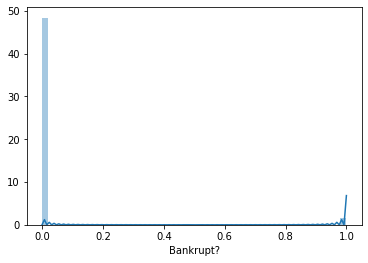

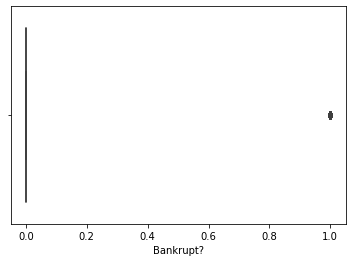

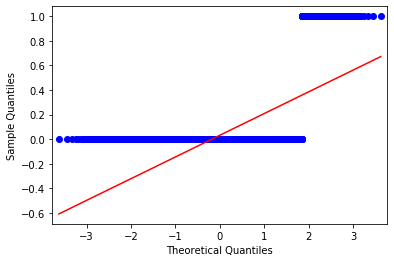

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt?, dtype: float64

Skew is 5.294222599216838
Kurtosis is 26.028792930058287
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.167,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=2532.247
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=6599.000,p=0.971

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.540,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Ko

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


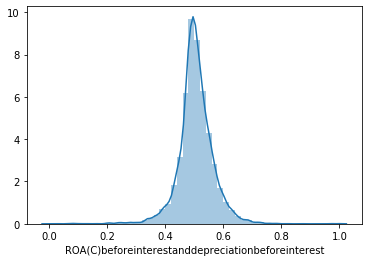

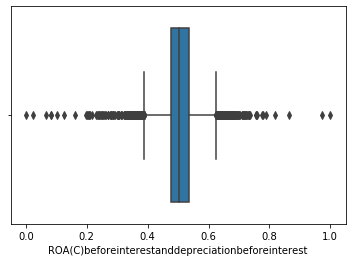

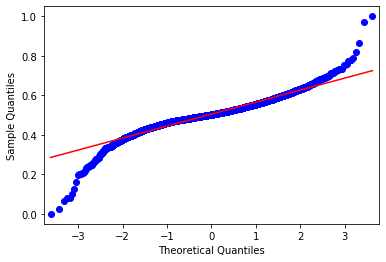

count    6819.000000
mean        0.505180
std         0.060686
min         0.000000
25%         0.476527
50%         0.502706
75%         0.535563
max         1.000000
Name: ROA(C)beforeinterestanddepreciationbeforeinterest, dtype: float64

Skew is -0.323869740413385
Kurtosis is 6.385205395841393
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.937,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=80.761
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=49.703,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.081,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.625,p=0.000

Not normally distributed according to Kolmogoro

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


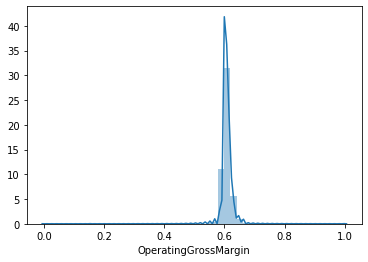

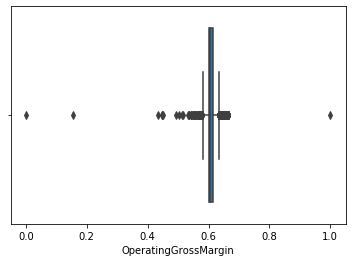

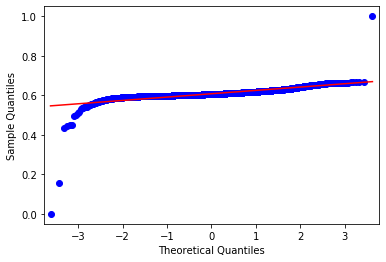

count    6819.000000
mean        0.607948
std         0.016934
min         0.000000
25%         0.600445
50%         0.605997
75%         0.613914
max         1.000000
Name: OperatingGrossMargin, dtype: float64

Skew is -8.041598526220653
Kurtosis is 365.27181562449664
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.606,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=335.858
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=3.216,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.160,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.710,p=0.000

Not normally distributed according to Kolmo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


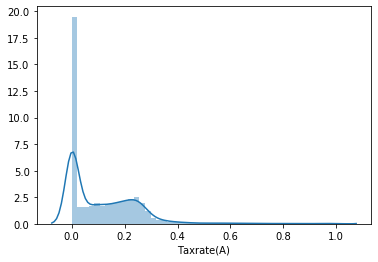

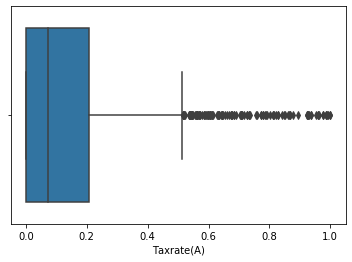

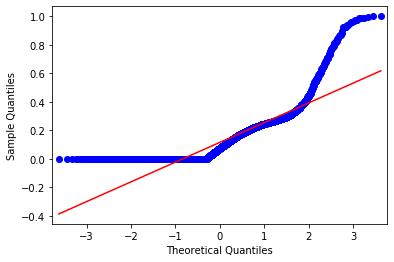

count    6819.000000
mean        0.115001
std         0.138667
min         0.000000
25%         0.000000
50%         0.073489
75%         0.205841
max         1.000000
Name: Taxrate(A), dtype: float64

Skew is 1.9034564247474677
Kurtosis is 6.406758190266409
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.786,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=360.344
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=1140.002,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.203,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolmog

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


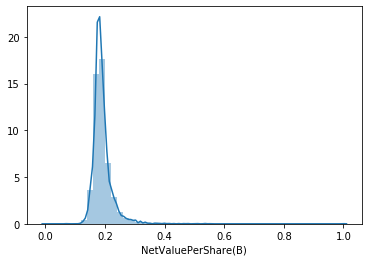

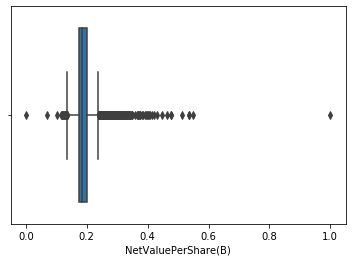

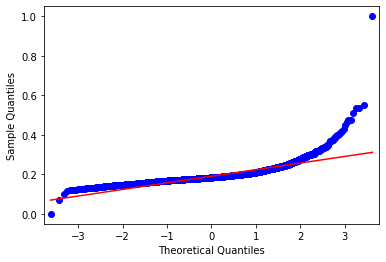

count    6819.000000
mean        0.190661
std         0.033390
min         0.000000
25%         0.173613
50%         0.184400
75%         0.199570
max         1.000000
Name: NetValuePerShare(B), dtype: float64

Skew is 4.56131892512412
Kurtosis is 64.62868272759968
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.750,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=308.801
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=39.868,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.146,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.549,p=0.000

Not normally distributed according to Kolmogo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


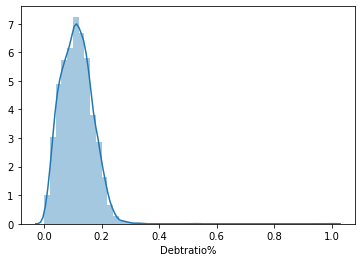

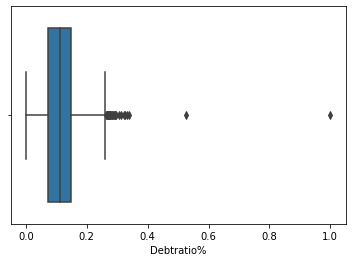

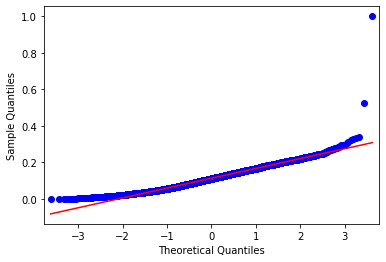

count    6819.000000
mean        0.113177
std         0.053920
min         0.000000
25%         0.072891
50%         0.111407
75%         0.148804
max         1.000000
Name: Debtratio%, dtype: float64

Skew is 0.980580354349549
Kurtosis is 10.720981589684031
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.964,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=11.040
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=175.147,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.026,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolmo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


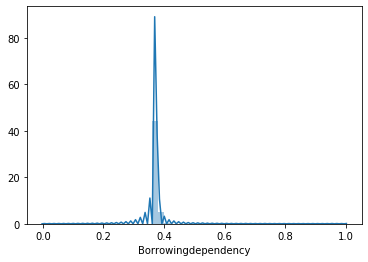

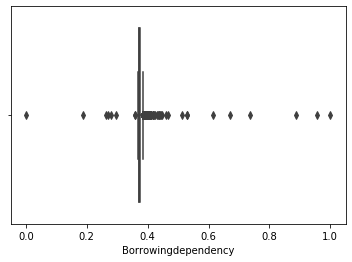

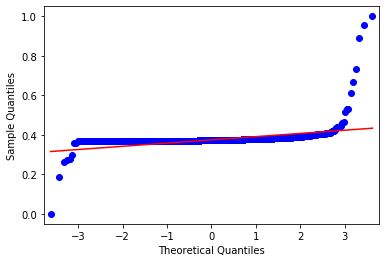

count    6819.000000
mean        0.374654
std         0.016286
min         0.000000
25%         0.370168
50%         0.372624
75%         0.376271
max         1.000000
Name: Borrowingdependency, dtype: float64

Skew is 20.83430660129552
Kurtosis is 802.0571969405269
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.190,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=1277.119
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=4.827,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.378,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.643,p=0.000

Not normally distributed according to Kolmog

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


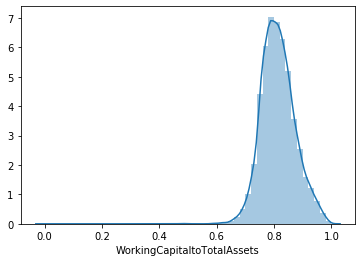

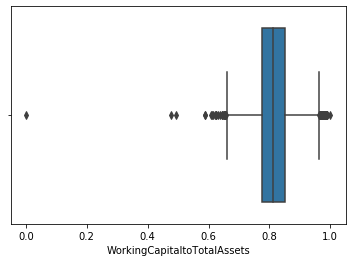

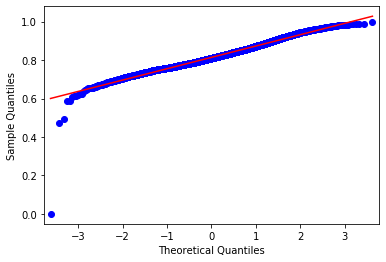

count    6819.000000
mean        0.814125
std         0.059054
min         0.000000
25%         0.774309
50%         0.810275
75%         0.850383
max         1.000000
Name: WorkingCapitaltoTotalAssets, dtype: float64

Skew is -0.19226904158493632
Kurtosis is 5.508878311045477
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.977,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=15.848
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=29.206,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.033,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.744,p=0.000

Not normally distributed according to Kolmogo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


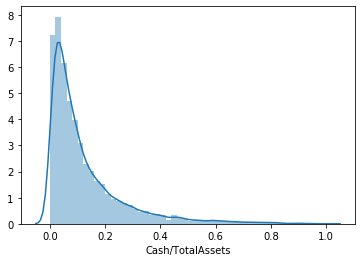

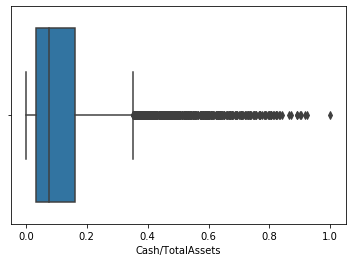

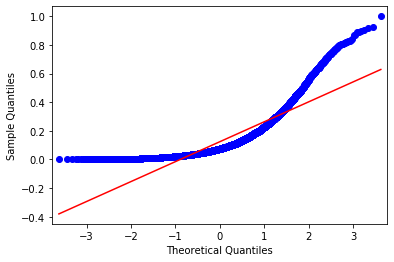

count    6819.000000
mean        0.124095
std         0.139251
min         0.000000
25%         0.033543
50%         0.074887
75%         0.161073
max         1.000000
Name: Cash/TotalAssets, dtype: float64

Skew is 2.2298695957015022
Kurtosis is 5.904654148377487
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.755,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=485.896
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=1065.365,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.187,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kol

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


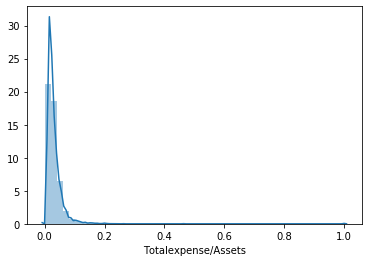

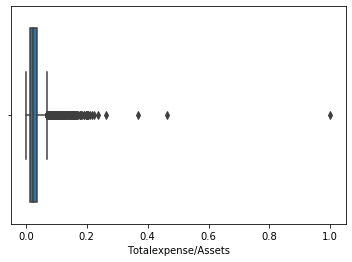

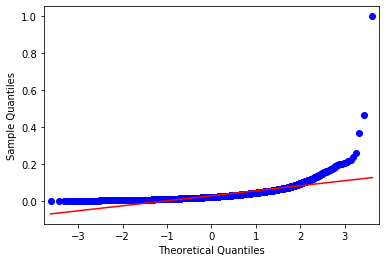

count    6819.000000
mean        0.029184
std         0.027149
min         0.000000
25%         0.014567
50%         0.022674
75%         0.035930
max         1.000000
Name: Totalexpense/Assets, dtype: float64

Skew is 9.479641694091107
Kurtosis is 259.47297751736016
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.614,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=449.201
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=172.191,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.170,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolm

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


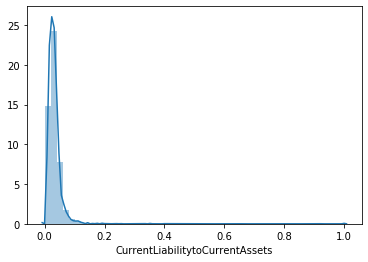

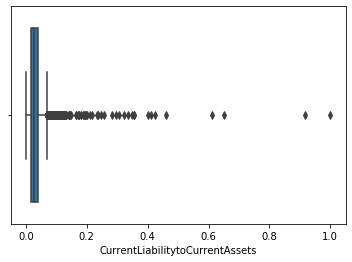

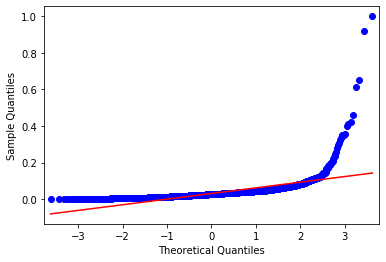

count    6819.000000
mean        0.031506
std         0.030845
min         0.000000
25%         0.018034
50%         0.027597
75%         0.038375
max         1.000000
Name: CurrentLiabilitytoCurrentAssets, dtype: float64

Skew is 13.185759211620375
Kurtosis is 310.7703628932934
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.459,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=576.521
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=205.883,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.185,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolm

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


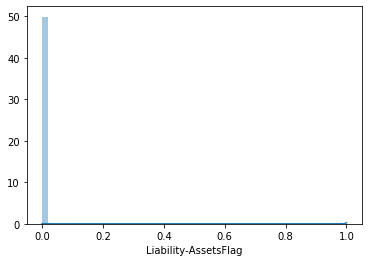

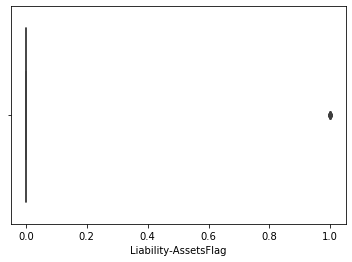

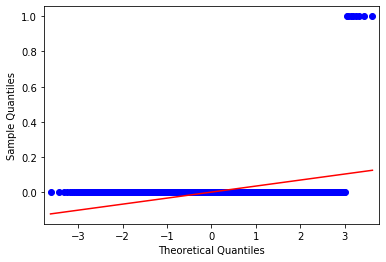

count    6819.000000
mean        0.001173
std         0.034234
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Liability-AssetsFlag, dtype: float64

Skew is 29.144058992709777
Kurtosis is 847.3761745705473
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.013,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=2631.741
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=6811.000,p=0.522

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.512,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Ko

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [49]:
for i in df2.columns:
    t.numerical_analysis(df2,i)

0    6811
1       8
Name: Liability-AssetsFlag, dtype: int64


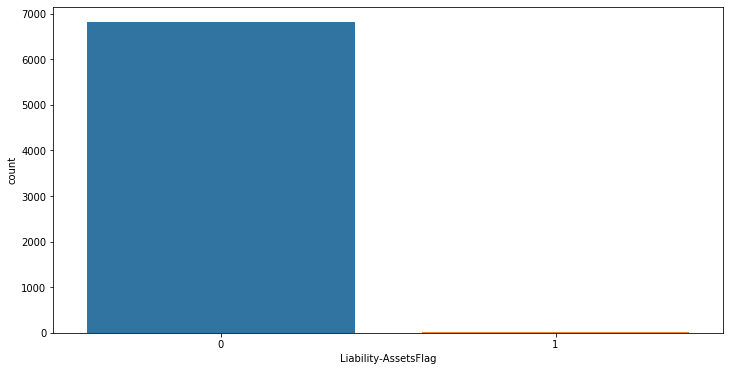

In [50]:
t.categorical_analysis(df2,'Liability-AssetsFlag')

This column will not help in analysis

In [53]:
t.remove_cols(df2,'Liability-AssetsFlag')

These columns are right skwewed: Taxrate(A),NetValuePerShare(B),Debtratio%,Cash/TotalAssets,Totalexpense/Assets,CurrentLiabilitytoCurrentAssets

In [56]:
from scipy.stats import yeojohnson
c=['Taxrate(A)','NetValuePerShare(B)','Debtratio%','Cash/TotalAssets','Totalexpense/Assets','CurrentLiabilitytoCurrentAssets']
for i in c:
    df2[i],liam = yeojohnson(df2[i])

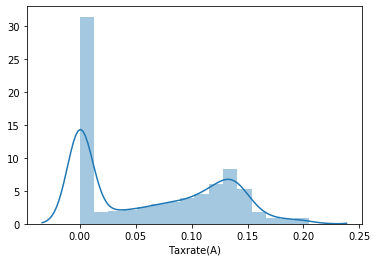

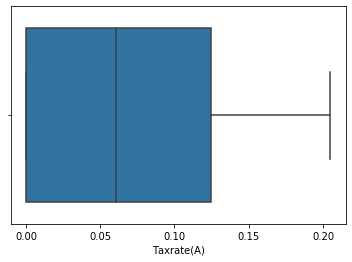

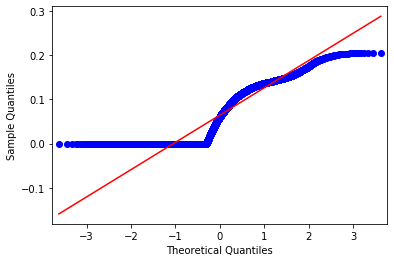

count    6819.000000
mean        0.064574
std         0.061755
min        -0.000000
25%        -0.000000
50%         0.060324
75%         0.124576
max         0.204904
Name: Taxrate(A), dtype: float64

Skew is 0.26028580073606633
Kurtosis is -1.4454677472209876
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.846,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=423.906
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=402.667,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.229,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolm

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


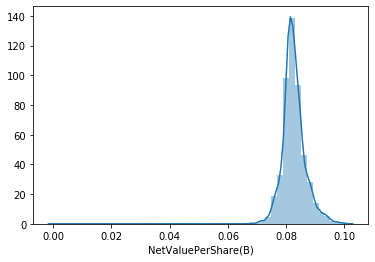

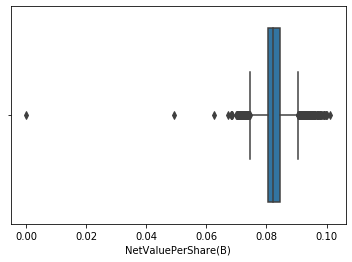

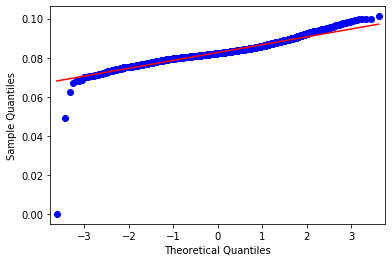

count    6819.000000
mean        0.082640
std         0.004019
min        -0.000000
25%         0.080458
50%         0.082261
75%         0.084512
max         0.101228
Name: NetValuePerShare(B), dtype: float64

Skew is -0.8296020642841324
Kurtosis is 28.076530322125098
Cannot be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.924,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=79.191
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=1.333,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.071,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.527,p=0.000

Not normally distributed according to Kolmo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


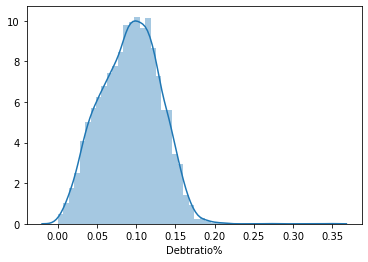

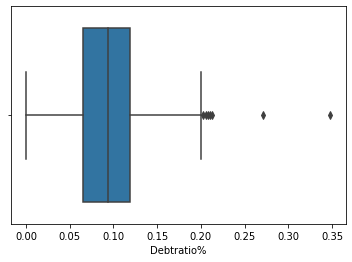

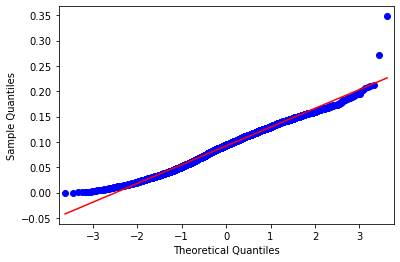

count    6819.000000
mean        0.092177
std         0.037033
min        -0.000000
25%         0.064993
50%         0.093847
75%         0.118888
max         0.347864
Name: Debtratio%, dtype: float64

Skew is -0.001472798209444908
Kurtosis is -0.19669276914377987
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.992,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=11.302
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=101.440,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.026,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Ko

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


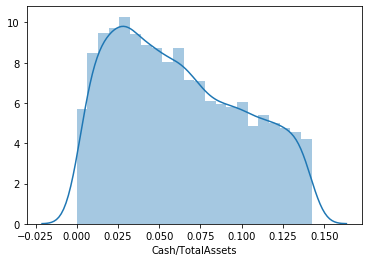

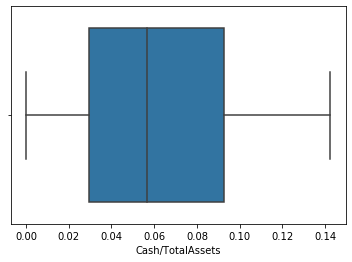

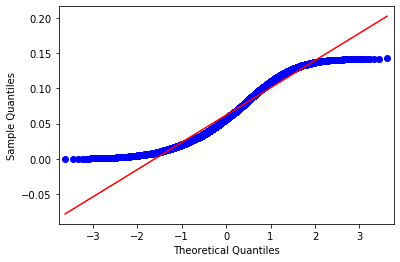

count    6819.000000
mean        0.062100
std         0.038716
min        -0.000000
25%         0.029476
50%         0.056749
75%         0.092829
max         0.142396
Name: Cash/TotalAssets, dtype: float64

Skew is 0.3407396330020979
Kurtosis is -1.0011051474464037
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.953,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=86.533
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=164.570,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.071,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolmog

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


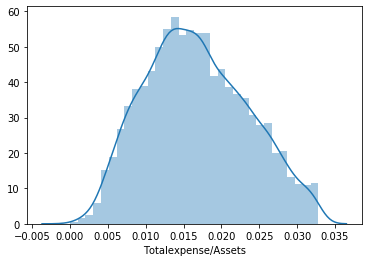

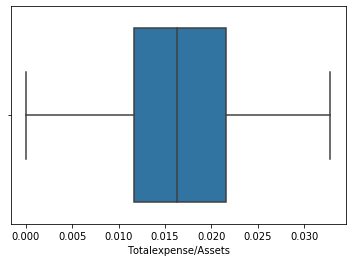

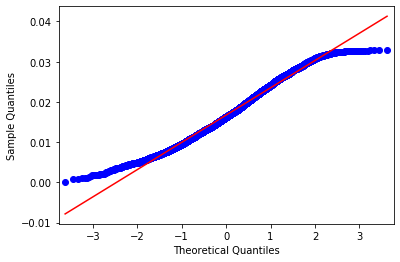

count    6819.000000
mean        0.016737
std         0.006785
min        -0.000000
25%         0.011697
50%         0.016246
75%         0.021627
max         0.032826
Name: Totalexpense/Assets, dtype: float64

Skew is 0.22919461301480354
Kurtosis is -0.6353937323084695
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.986,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=20.908
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=18.755,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.038,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolmog

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


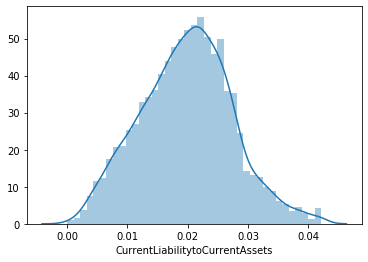

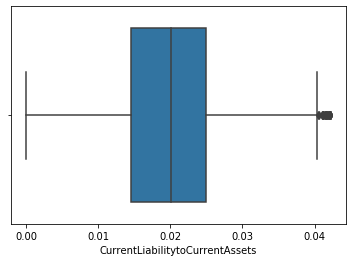

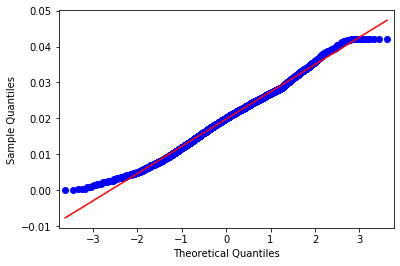

count    6819.000000
mean        0.019794
std         0.007603
min        -0.000000
25%         0.014568
50%         0.020057
75%         0.024903
max         0.042167
Name: CurrentLiabilitytoCurrentAssets, dtype: float64

Skew is 0.08619096743446829
Kurtosis is -0.1321647986999821
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.996,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=5.042
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=19.909,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.019,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.500,p=0.000

Not normally distributed according to Kolmogo

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [57]:
for i in c:
    t.numerical_analysis(df2,i)

WorkingCapitaltoTotalAssets is left skewed. Performing square transformation

In [62]:
df2['WorkingCapitaltoTotalAssets']=(df2['WorkingCapitaltoTotalAssets'])**2

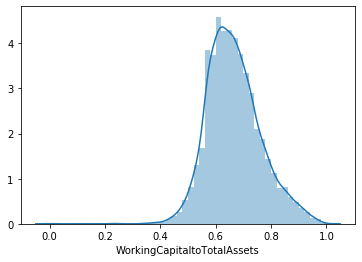

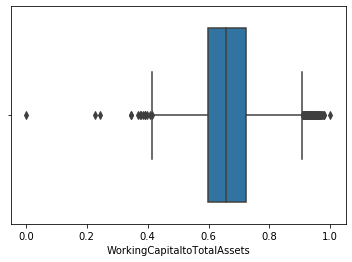

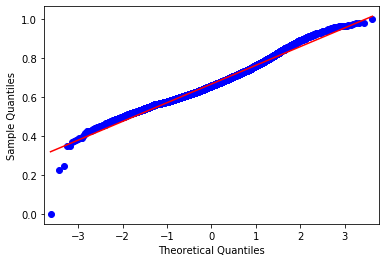

count    6819.000000
mean        0.666287
std         0.095959
min         0.000000
25%         0.599554
50%         0.656546
75%         0.723151
max         1.000000
Name: WorkingCapitaltoTotalAssets, dtype: float64

Skew is 0.3866619385355013
Kurtosis is 0.6223478274044814
Can be considered normally distributed on the basis of skewness and kurtosis


Shapiro Wilk Test for Normality
stat=0.984,p=0.000

Not Normally distributed according to shapiro test


Anderson Test for Normality
stat=31.477
Probably Not Normally distributed 0.576 critical value at 15.0 level of significance
Probably Not Normally distributed 0.656 critical value at 10.0 level of significance
Probably Not Normally distributed 0.787 critical value at 5.0 level of significance
Probably Not Normally distributed 0.917 critical value at 2.5 level of significance
Probably Not Normally distributed 1.091 critical value at 1.0 level of significance


Chi square Normality test
stat=94.226,p=1.000

Normally distributed according to chisquare test


Lilliefors Test for Normality
stat=0.044,p=0.000

Not Normally distributed according to lilliefors test


Kolmogorov-Smirnov test
stat=0.671,p=0.000

Not normally distributed according to Kolmogor

E:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [64]:
t.numerical_analysis(df2,'WorkingCapitaltoTotalAssets')

Skewness has improved

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Accuracy  (%): 
 96.33431085043989
AUC  (%): 
 57.57657213685169
Precision: 
 53.333333333333336
Recall (%): 
 15.686274509803921
f1 score (%): 
 24.24242424242424
logistic loss :
 1.2660882822049462
KNN
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.53      0.16      0.24        51

    accuracy                           0.96      1364
   macro avg       0.75      0.58      0.61      1364
weighted avg       0.95      0.96      0.95      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


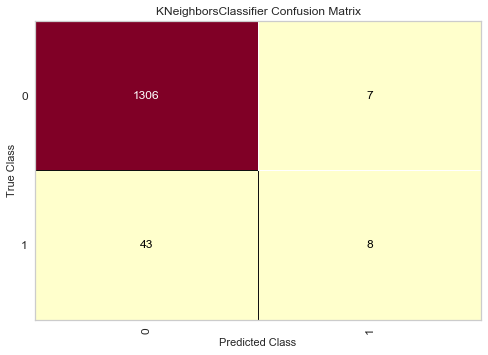

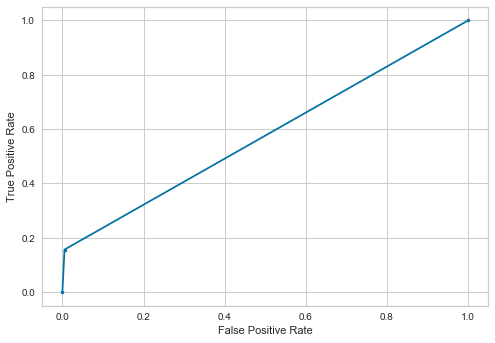

In [66]:
t.fit_model(df2,'Bankrupt?','KNN',classification=True)

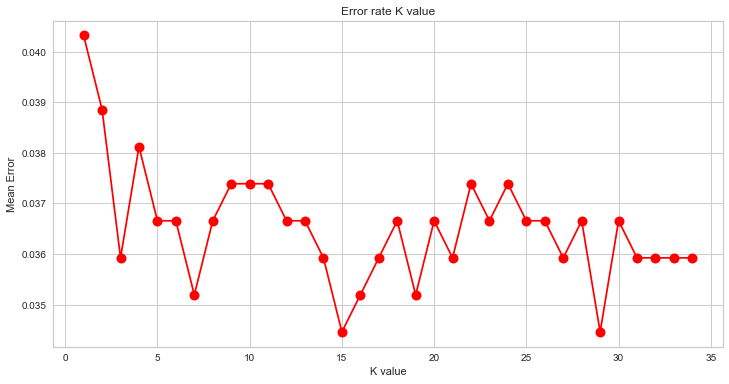

In [67]:
t.knn_plot(df2,'Bankrupt?',classification=True,over_sample=False)

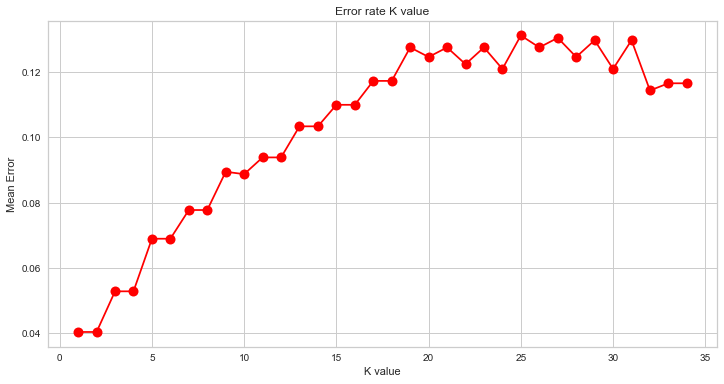

In [69]:
t.knn_plot(df2,'Bankrupt?',classification=True,over_sample=True)

Changing number of neighbors

Accuracy  (%): 
 96.48093841642229
AUC  (%): 
 58.595045024864476
Precision: 
 60.0
Recall (%): 
 17.647058823529413
f1 score (%): 
 27.27272727272727
logistic loss :
 1.2154443288418586
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.60      0.18      0.27        51

    accuracy                           0.96      1364
   macro avg       0.78      0.59      0.63      1364
weighted avg       0.96      0.96      0.96      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


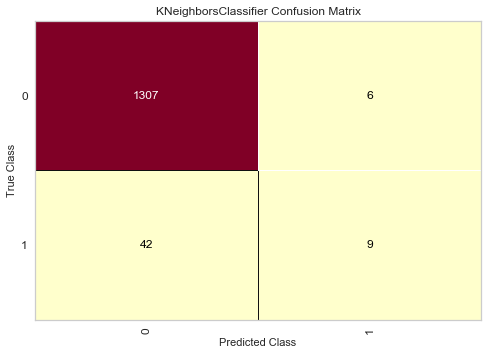

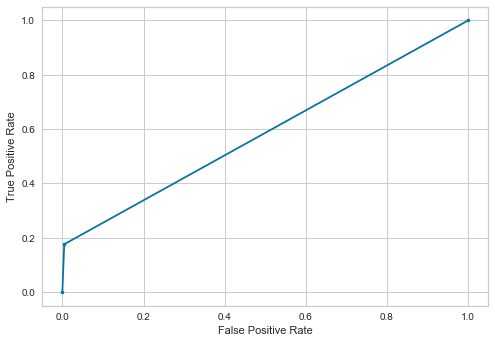

In [71]:
t.knn_with_n(df2,'Bankrupt?',n=7,classification=True,over_sample=False,sampling_strategy=0.5)

oversampling

Accuracy  (%): 
 92.22873900293254
AUC  (%): 
 78.05952540955452
Precision: 
 26.89075630252101
Recall (%): 
 62.745098039215684
f1 score (%): 
 37.64705882352941
logistic loss :
 2.684149459557889
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1313
           1       0.27      0.63      0.38        51

    accuracy                           0.92      1364
   macro avg       0.63      0.78      0.67      1364
weighted avg       0.96      0.92      0.94      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


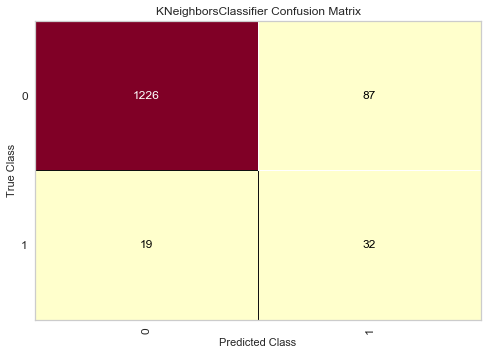

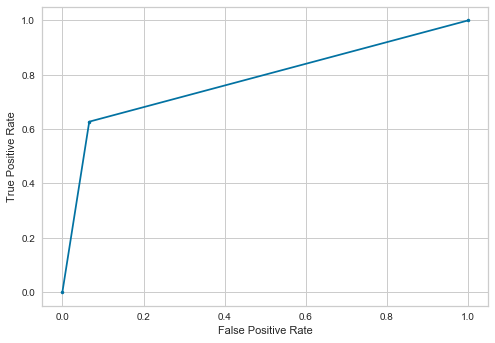

In [72]:
t.knn_with_n(df2,'Bankrupt?',n=7,classification=True,over_sample=True,sampling_strategy=0.5)

Accuracy  (%): 
 92.22873900293254
AUC  (%): 
 78.05952540955452
Precision: 
 26.89075630252101
Recall (%): 
 62.745098039215684
f1 score (%): 
 37.64705882352941
logistic loss :
 2.684149459557889
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1313
           1       0.27      0.63      0.38        51

    accuracy                           0.92      1364
   macro avg       0.63      0.78      0.67      1364
weighted avg       0.96      0.92      0.94      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


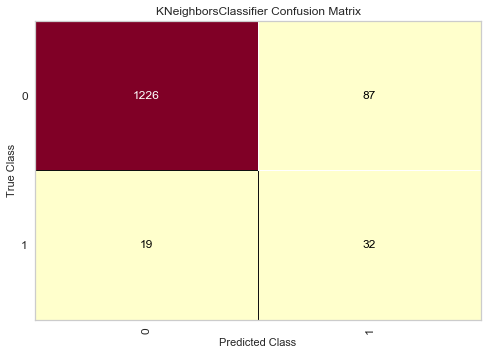

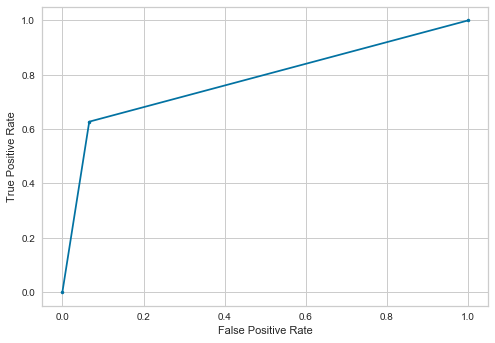

In [77]:
t.knn_with_n(df2,'Bankrupt?',n=7,classification=True,over_sample=True,sampling_strategy='minority')

The highest f1 score achieved is 0.38 for the minority class. These are the results obtained when data has been transformed to exhibit normal behaviour

Fitting model without transformation

In [80]:
df3=t.deep_copy(df)

In [83]:
df3=df3[['Bankrupt?','ROA(C)beforeinterestanddepreciationbeforeinterest','OperatingGrossMargin','Taxrate(A)','NetValuePerShare(B)','Debtratio%','Borrowingdependency','WorkingCapitaltoTotalAssets','Cash/TotalAssets','Totalexpense/Assets','CurrentLiabilitytoCurrentAssets','Liability-AssetsFlag']]


In [84]:
df3

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,OperatingGrossMargin,Taxrate(A),NetValuePerShare(B),Debtratio%,Borrowingdependency,WorkingCapitaltoTotalAssets,Cash/TotalAssets,Totalexpense/Assets,CurrentLiabilitytoCurrentAssets,Liability-AssetsFlag
0,1,0.370594,0.601457,0.000000,0.147950,0.207576,0.390284,0.672775,0.004094,0.064856,0.118250,0
1,1,0.464291,0.610235,0.000000,0.182251,0.171176,0.376760,0.751111,0.014948,0.025516,0.047775,0
2,1,0.426071,0.601450,0.000000,0.177911,0.207516,0.379093,0.829502,0.000991,0.021387,0.025346,0
3,1,0.399844,0.583541,0.000000,0.154187,0.151465,0.379743,0.725754,0.018851,0.024161,0.067250,0
4,1,0.465022,0.598783,0.000000,0.167502,0.106509,0.375025,0.751822,0.014161,0.026385,0.047725,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.113372,0.175045,0.124618,0.373823,0.817769,0.099481,0.019060,0.027951,0
6815,0,0.475162,0.598308,0.371596,0.181324,0.099253,0.372505,0.793387,0.080337,0.011118,0.031470,0
6816,0,0.472725,0.610444,0.490839,0.269521,0.038939,0.369637,0.866047,0.412885,0.035446,0.007542,0
6817,0,0.506264,0.607850,0.181294,0.213392,0.086979,0.369649,0.832340,0.112238,0.016443,0.022916,0


Accuracy  (%): 
 96.48093841642229
AUC  (%): 
 60.4796678762899
Precision: 
 57.89473684210527
Recall (%): 
 21.568627450980394
f1 score (%): 
 31.428571428571427
logistic loss :
 1.2154455012721082
KNN
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.58      0.22      0.31        51

    accuracy                           0.96      1364
   macro avg       0.77      0.60      0.65      1364
weighted avg       0.96      0.96      0.96      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


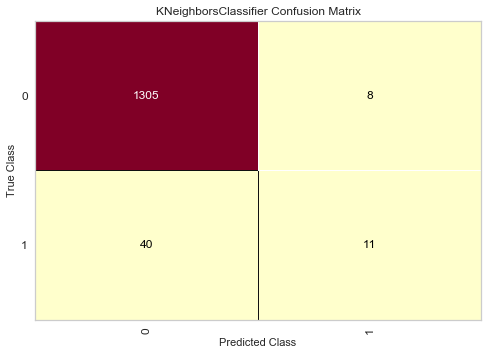

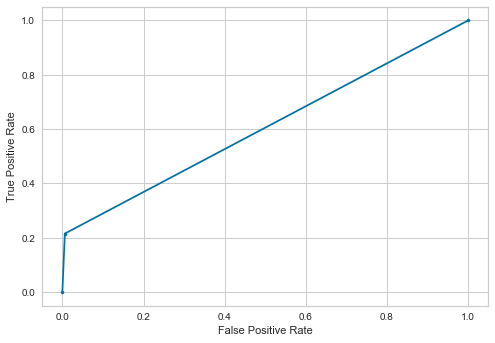

In [85]:
t.fit_model(df3,'Bankrupt?','KNN',classification=True)

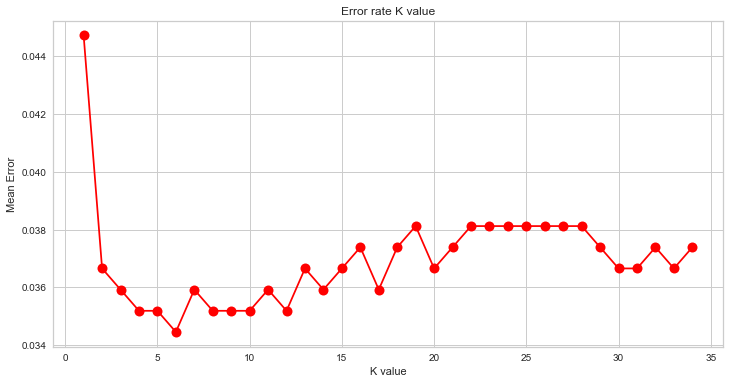

In [86]:
t.knn_plot(df3,'Bankrupt?',classification=True,over_sample=False)

Accuracy  (%): 
 96.40762463343108
AUC  (%): 
 62.326209996565275
Precision: 
 54.166666666666664
Recall (%): 
 25.49019607843137
f1 score (%): 
 34.666666666666664
logistic loss :
 1.2407689434914642
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.54      0.25      0.35        51

    accuracy                           0.96      1364
   macro avg       0.76      0.62      0.66      1364
weighted avg       0.96      0.96      0.96      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


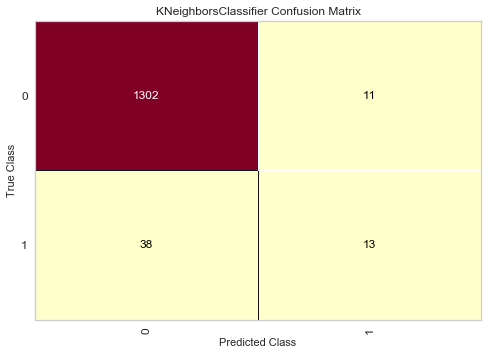

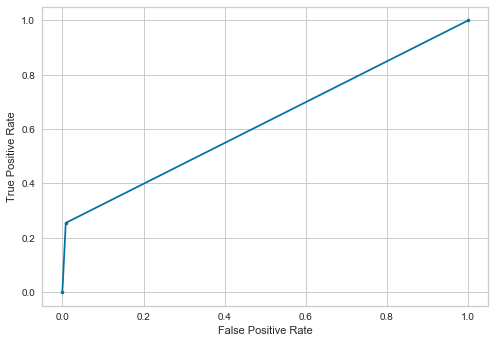

In [92]:
t.knn_with_n(df3,'Bankrupt?',n=3,classification=True,over_sample=False,sampling_strategy=0.5)

oversampling

Accuracy  (%): 
 94.64809384164224
AUC  (%): 
 72.72000955751685
Precision: 
 34.72222222222222
Recall (%): 
 49.01960784313725
f1 score (%): 
 40.650406504065046
logistic loss :
 1.8485104530115106
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1313
           1       0.35      0.49      0.41        51

    accuracy                           0.95      1364
   macro avg       0.66      0.73      0.69      1364
weighted avg       0.96      0.95      0.95      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


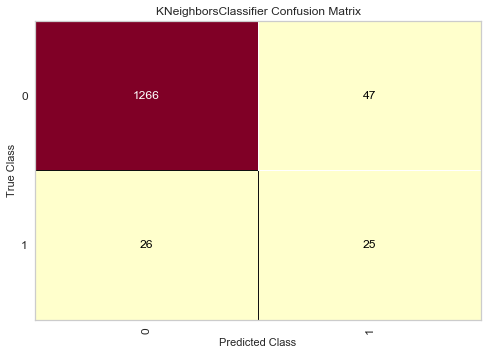

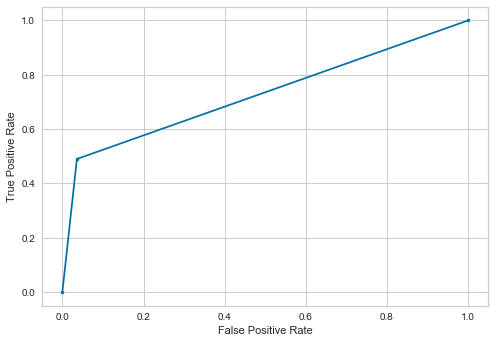

In [95]:
t.knn_with_n(df3,'Bankrupt?',n=3,classification=True,over_sample=True,sampling_strategy=0.5)

Accuracy  (%): 
 92.96187683284457
AUC  (%): 
 79.38264414676762
Precision: 
 29.72972972972973
Recall (%): 
 64.70588235294117
f1 score (%): 
 40.74074074074075
logistic loss :
 2.4309273478819513
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1313
           1       0.30      0.65      0.41        51

    accuracy                           0.93      1364
   macro avg       0.64      0.79      0.68      1364
weighted avg       0.96      0.93      0.94      1364



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


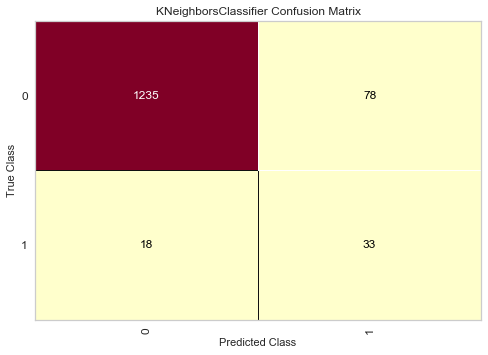

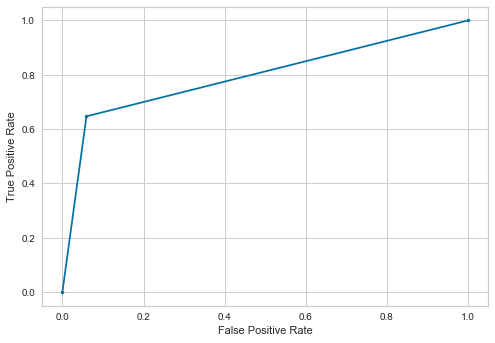

In [100]:
t.knn_with_n(df3,'Bankrupt?',n=7,classification=True,over_sample=True,sampling_strategy='minority')

Without transforming data the f1 score achieved is 0.41 for minority class